Epoch [10/100], Train Loss: 1.5798, Test Loss: 1.5690
Epoch [20/100], Train Loss: 1.5116, Test Loss: 1.4917
Epoch [30/100], Train Loss: 1.4026, Test Loss: 1.3701
Epoch [40/100], Train Loss: 1.2578, Test Loss: 1.2088
Epoch [50/100], Train Loss: 1.0833, Test Loss: 1.0275
Epoch [60/100], Train Loss: 0.9000, Test Loss: 0.8532
Epoch [70/100], Train Loss: 0.7419, Test Loss: 0.7172
Epoch [80/100], Train Loss: 0.6341, Test Loss: 0.6267
Epoch [90/100], Train Loss: 0.5618, Test Loss: 0.5770
Epoch [100/100], Train Loss: 0.5018, Test Loss: 0.5443


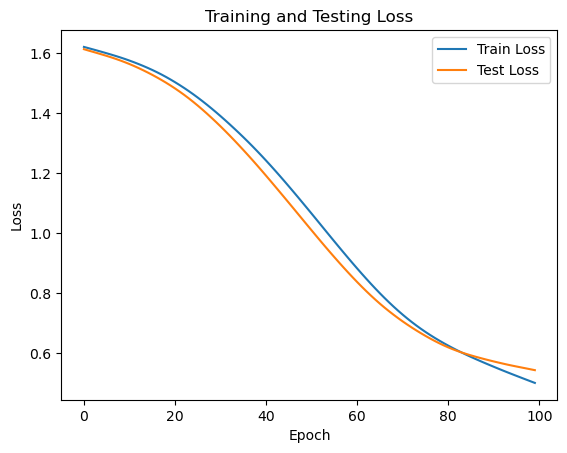

Accuracy: 0.7700
Precision: 0.7645
Recall: 0.7634
F1-score: 0.7631


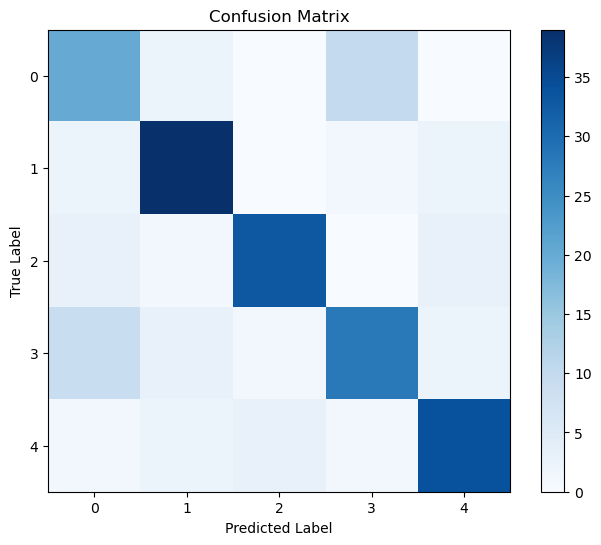

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, n_clusters_per_class=1, n_informative=5, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define hyperparameters
input_size = 20 # Number of input features
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
output_size = 5 # Number of classes
learning_rate = 0.001
num_epochs = 100

# Initialize model
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)
    test_losses.append(loss_test.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

# Plot training and testing loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    output = model(X_test)
    predicted = torch.argmax(output, 1)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')
f1 = f1_score(y_test, predicted, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(5), np.arange(5))
plt.yticks(np.arange(5), np.arange(5))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
